# Aula 02 - FAST.AI: Criando o Modelo Cats

### Import inicial

In [1]:
from fastai.vision.all import *

### Pets dataset

In [2]:
path = untar_data(URLs.PETS)/'images'

### Checando se é gato

In [4]:
def is_cat(x): return x[0].isupper()

### Criando Dataloaders

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

### Mostrando parte dos dados

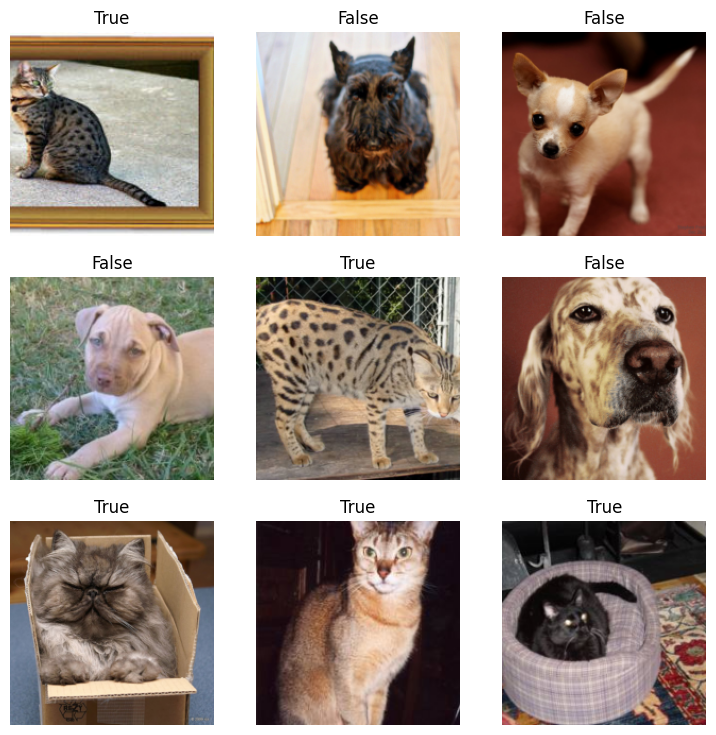

In [9]:
dls.show_batch()

### Treinando o modelo

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\keng\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.190532,0.058384,0.020974,04:22


epoch,train_loss,valid_loss,error_rate,time
0,0.068842,0.062512,0.016238,05:20
1,0.040181,0.025811,0.009472,05:25
2,0.018107,0.021445,0.010149,05:30


### Exportando o modelo

In [7]:
learn.export('model.pkl')